In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import datetime
warnings.filterwarnings("ignore")
# 显示最大列数
pd.set_option('max_columns',120)
# sns.set(style="darkgrid", font_scale=1.2)
plt.rcParams["font.family"] = "SimHei"
# 解决中文乱码问题
plt.rcParams["axes.unicode_minus"] = False

### 1.加载数据集

In [2]:
train = pd.read_csv('./data/train.csv')
testA = pd.read_csv("./data/testA.csv")
display(train.shape,testA.shape)

(800000, 47)

(200000, 46)

In [3]:
all_data = train.append(testA)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 199999
Data columns (total 47 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1000000 non-null  int64  
 1   loanAmnt            1000000 non-null  float64
 2   term                1000000 non-null  int64  
 3   interestRate        1000000 non-null  float64
 4   installment         1000000 non-null  float64
 5   grade               1000000 non-null  object 
 6   subGrade            1000000 non-null  object 
 7   employmentTitle     999999 non-null   float64
 8   employmentLength    941459 non-null   object 
 9   homeOwnership       1000000 non-null  int64  
 10  annualIncome        1000000 non-null  float64
 11  verificationStatus  1000000 non-null  int64  
 12  issueDate           1000000 non-null  object 
 13  isDefault           800000 non-null   float64
 14  purpose             1000000 non-null  int64  
 15  postCode        

In [4]:
all_data['n0'].value_counts()

0.0     724407
1.0     120132
2.0      48336
3.0      22050
4.0      13177
5.0       7751
6.0       4838
7.0       3084
8.0       1912
9.0       1251
10.0       855
11.0       510
12.0       409
13.0       236
14.0       210
15.0       101
16.0        87
17.0        61
18.0        47
19.0        26
23.0        20
20.0        18
21.0        18
22.0        16
24.0        14
25.0        11
26.0        10
29.0         6
31.0         5
27.0         5
28.0         3
30.0         3
32.0         2
34.0         2
33.0         2
51.0         1
39.0         1
38.0         1
35.0         1
Name: n0, dtype: int64

### 2.数据预处理

#### 2.1 数据类型转换

In [5]:
# 把非数值类型变量转换为数值类型变量
not_number = []
number = []
for k,v in all_data.dtypes.items():
#     print(k,v)
    if not np.issubdtype(v,np.number):
        not_number.append(k)
    elif np.issubdtype(v,np.number):
        number.append(k)
print("非数值类型变量",not_number)
print("数值类型变量",number)

非数值类型变量 ['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']
数值类型变量 ['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'employmentTitle', 'homeOwnership', 'annualIncome', 'verificationStatus', 'isDefault', 'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years', 'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec', 'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc', 'initialListStatus', 'applicationType', 'title', 'policyCode', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14']


In [6]:
def get_numerical_serial_fea(data,feas):
    numerical_serial_fea = []
    numerical_noserial_fea = []
    for fea in feas:
        temp = data[fea].nunique()
        # 数据量小于10，判定为离散性数据变量
        if temp <= 10:
            numerical_noserial_fea.append(fea)
            continue
        # 连续性数据变量
        numerical_serial_fea.append(fea)
    return numerical_noserial_fea, numerical_serial_fea

numerical_noserial_fea, numerical_serial_fea = get_numerical_serial_fea(train,number)

In [7]:
print("离散型变量：",numerical_noserial_fea,"\n连续型变量：" ,numerical_serial_fea)

离散型变量： ['term', 'homeOwnership', 'verificationStatus', 'isDefault', 'initialListStatus', 'applicationType', 'policyCode', 'n11', 'n12'] 
连续型变量： ['id', 'loanAmnt', 'interestRate', 'installment', 'employmentTitle', 'annualIncome', 'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years', 'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec', 'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc', 'title', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n13', 'n14']


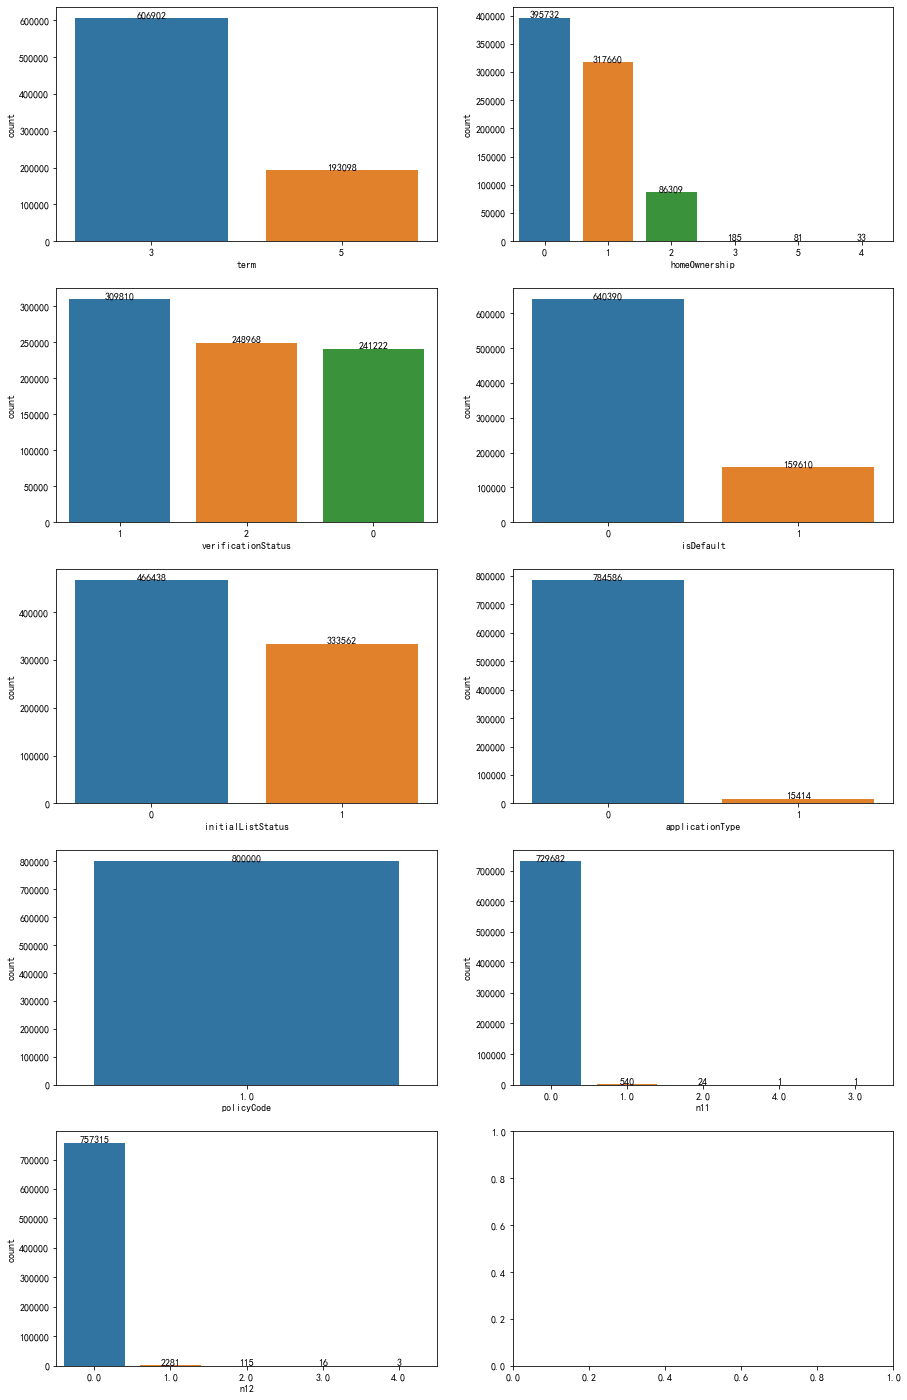

In [8]:
# 绘制离散性数据变量 用条形图来统计 连续型变量用数据分布图来展现
def plot_var(name_list,data):
    """绘制变量的每个类别的数量。
    Parameters
    ----------
    name : str
    变量的名称。
    data : dataframe
    表结构
    """
    num = len(name_list)
    row, col = np.ceil(num / 2).astype(np.int32), 2
    fig, ax = plt.subplots(row, col)
    fig.set_size_inches(15, row * 5)
    ax = ax.ravel()
    for index, name in enumerate(name_list):
        v = data[name].value_counts()
        sns.countplot(x=name, data=data, order=v.index, ax=ax[index])
    # 在图像上绘制数值。
        for x, y in enumerate(v):
            t = ax[index].text(x, y, y)
            # 数值居中对齐。
            t.set_ha("center")
        if len(v) > 10:
            ax[index].set_xticklabels(ax[index].get_xticklabels(), rotation=90)
    
plot_var(numerical_noserial_fea,train)

#### 值的替换

In [9]:
# 非数值类型数据转化成数据类型数据
all_data.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,110000.0,2,2014-07-01,1.0,1,137.0,32,17.05,0.0,730.0,734.0,7.0,0.0,0.0,24178.0,48.9,27.0,0,0,Aug-2001,1.0,1.0,0.0,2.0,2.0,2.0,4.0,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,46000.0,2,2012-08-01,0.0,0,156.0,18,27.83,0.0,700.0,704.0,13.0,0.0,0.0,15096.0,38.9,18.0,1,0,May-2002,1723.0,1.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,74000.0,2,2015-10-01,0.0,0,337.0,14,22.77,0.0,675.0,679.0,11.0,0.0,0.0,4606.0,51.8,27.0,0,0,May-2006,0.0,1.0,0.0,0.0,3.0,3.0,0.0,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,3,11000.0,3,7.26,340.96,A,A4,46854.0,10+ years,1,118000.0,1,2015-08-01,0.0,4,148.0,11,17.21,0.0,685.0,689.0,9.0,0.0,0.0,9948.0,52.6,28.0,1,0,May-1999,4.0,1.0,6.0,4.0,6.0,6.0,4.0,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,4,3000.0,3,12.99,101.07,C,C2,54.0,NaN,1,29000.0,2,2016-03-01,0.0,10,301.0,21,32.16,0.0,690.0,694.0,12.0,0.0,0.0,2942.0,32.0,27.0,0,0,Aug-1977,11.0,1.0,1.0,2.0,7.0,7.0,2.0,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0


In [10]:
map_dict = {
    'A':1,'B':2,'C':3,'D':4,'E':5
}

all_data['grade'] = all_data['grade'].map(map_dict)

In [11]:
map_dict = {
    "10+ years": 10, "9 years": 9, "8 years": 8,
"7 years": 7, "6 years": 6, "5 years": 5,
"4 years": 4, "3 years": 3, "2 years": 2,
"1 year": 1, "< 1 year": 0
}

all_data['employmentLength'] = all_data['employmentLength'].map(map_dict)

#### 日期转换

In [12]:
# issuedate 贷款发放的月份
all_data['issueDate'].value_counts().sort_values()

2007-06-01        1
2007-09-01       11
2008-09-01       24
2007-07-01       25
2007-08-01       27
              ...  
2014-10-01    26768
2015-12-01    28966
2015-07-01    30590
2015-10-01    31918
2016-03-01    36542
Name: issueDate, Length: 139, dtype: int64

In [13]:
# 将int类型转换为日期类型
# 日期减去起始日期 转换为多少天
all_data['issueDate'] = pd.to_datetime(all_data['issueDate'],format="%Y-%m-%d")
startdate = datetime.datetime.strptime("2007-06-01", "%Y-%m-%d")
all_data['issueDate'] = all_data['issueDate'].apply(lambda x:x-startdate).dt.days

In [14]:
# 借款人最早报告的信用额度开立的月份
all_data['earliesCreditLine'].value_counts().sort_values()

Apr-1958       1
Oct-2015       1
May-1953       1
Nov-1953       1
May-1950       1
            ... 
Sep-2004    6556
Oct-2001    6636
Sep-2003    6710
Aug-2002    6779
Aug-2001    6957
Name: earliesCreditLine, Length: 726, dtype: int64

In [15]:
# 将借款人最早报告的信用额度开立的月份 转换成对应的年份
all_data['earliesCreditLine'] = all_data['earliesCreditLine'].apply(lambda x:int(x[-4:]))

#### 2.2 缺失值的处理

In [16]:
miss = all_data.isnull().sum(axis=0)
miss = pd.concat([miss,miss * 100 / all_data.shape[0]],axis = 1)
miss.columns = ['miss_num','miss_rate']
miss.sort_values('miss_num',ascending=False,inplace=True)
miss 

,miss_num,miss_rate
isDefault,200000,20.0000
n11,87327,8.7327
employmentLength,58541,5.8541
n8,50382,5.0382
n7,50381,5.0381
n1,50381,5.0381
n2,50381,5.0381
n3,50381,5.0381
n5,50381,5.0381
n6,50381,5.0381


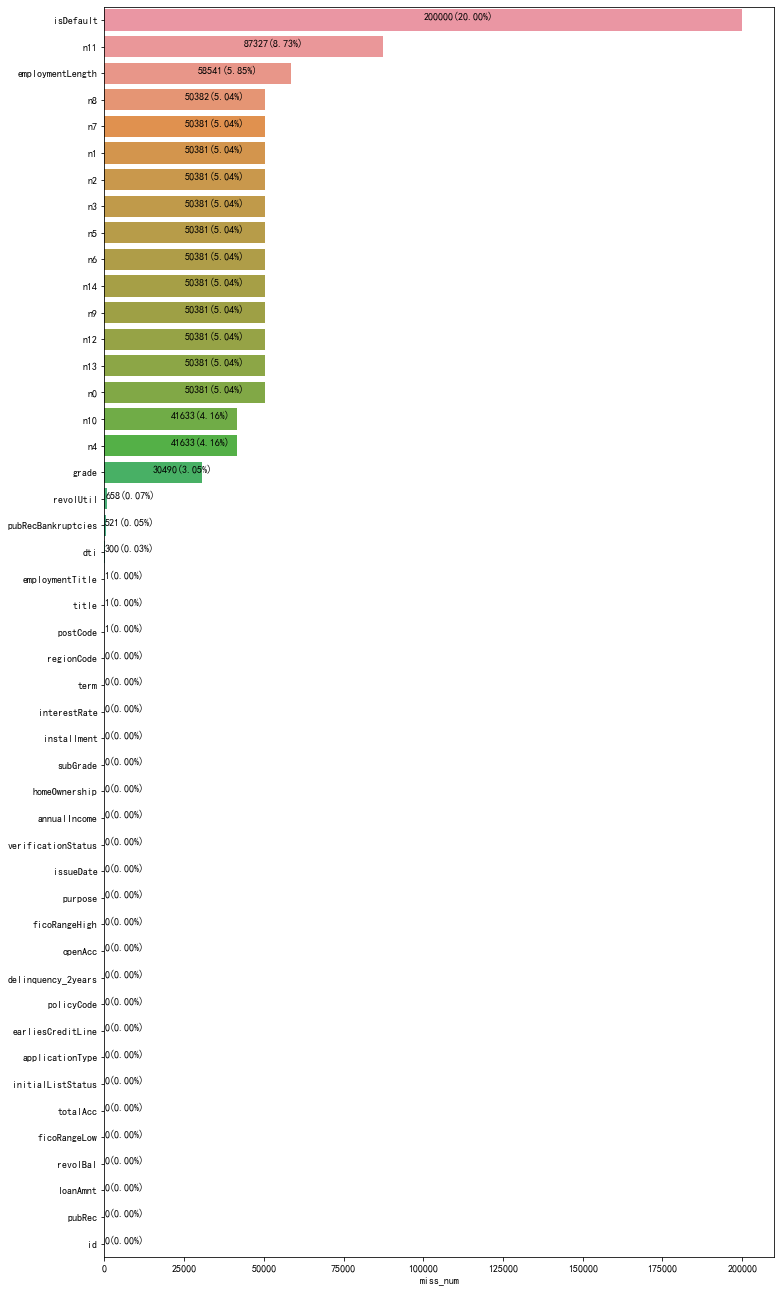

In [17]:
# 缺失值的可视化
ax = sns.barplot(y=miss.index,x=miss['miss_num'])
figsize = (12,miss.shape[0]//2)
ax.get_figure().set_size_inches(figsize)

for i in range(miss.shape[0]):
    num = miss["miss_num"].iloc[i]
    rate = miss["miss_rate"].iloc[i]
    ax.text(num / 2, i, f"{num}({rate:.2f}%)")

#### 2.2.1 缺失值的填充

In [18]:
# 查找缺失率在0-10之间
missing_columns = miss[(miss['miss_rate']<10)&(miss['miss_rate']>0)].index.tolist()

In [19]:
# 不能使用inplace直接填充，需要重新赋值给原来的列
all_data[missing_columns] = all_data[missing_columns].fillna(all_data[missing_columns].median())

In [20]:
# # 使用for循环进行填充,不能一次性填充
# # for循环填充错误
# for column in missing_columns:
#     median = all_data[column].median()
#     all_data[column] = all_data[missing_columns].fillna(value=median)

### 3.EDA

In [21]:
# 对训练数据集进行探索性数据分析

#### 3.1 查看训练数据集的正负样本数量及比例

In [22]:
is_counts = train.isDefault.value_counts()

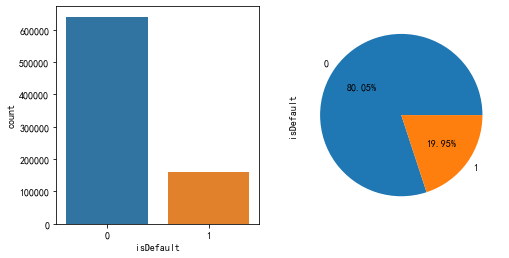

In [23]:
# 设置画布大小
plt.figure(figsize=(8,4))
ax = plt.subplot(1,2,1)
sns.countplot(x='isDefault',data = train,ax=ax)

ax = plt.subplot(1,2,2)
is_counts.plot(kind='pie',autopct = "%0.2f%%")

In [24]:
### 训练集和测试集合并一块进行数据预处理

### 4.特征工程

#### 4.1特征缩放

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
all_data.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,5.0,E2,320.0,2.0,2,110000.0,2,2587,1.0,1,137.0,32,17.05,0.0,730.0,734.0,7.0,0.0,0.0,24178.0,48.9,27.0,0,0,2001,1.0,1.0,0.0,2.0,2.0,2.0,4.0,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,4.0,D2,219843.0,5.0,0,46000.0,2,1888,0.0,0,156.0,18,27.83,0.0,700.0,704.0,13.0,0.0,0.0,15096.0,38.9,18.0,1,0,2002,1723.0,1.0,0.0,3.0,5.0,5.0,10.0,7.0,7.0,7.0,13.0,5.0,13.0,0.0,0.0,0.0,2.0
2,2,12000.0,5,16.99,298.17,4.0,D3,31698.0,8.0,0,74000.0,2,3044,0.0,0,337.0,14,22.77,0.0,675.0,679.0,11.0,0.0,0.0,4606.0,51.8,27.0,0,0,2006,0.0,1.0,0.0,0.0,3.0,3.0,0.0,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,3,11000.0,3,7.26,340.96,1.0,A4,46854.0,10.0,1,118000.0,1,2983,0.0,4,148.0,11,17.21,0.0,685.0,689.0,9.0,0.0,0.0,9948.0,52.6,28.0,1,0,1999,4.0,1.0,6.0,4.0,6.0,6.0,4.0,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,4,3000.0,3,12.99,101.07,3.0,C2,54.0,6.0,1,29000.0,2,3196,0.0,10,301.0,21,32.16,0.0,690.0,694.0,12.0,0.0,0.0,2942.0,32.0,27.0,0,0,1977,11.0,1.0,1.0,2.0,7.0,7.0,2.0,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0


In [27]:
all_data.describe()

,id,loanAmnt,term,interestRate,installment,grade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,800000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,499999.500000,14420.845925,3.482534,13.239673,438.105739,2.647488,72091.367296,5.967523,0.614190,7.619750e+04,1.009832,2927.600845,0.199513,1.745668,258.480370,16.394772,18.285702,0.317770,696.196545,700.196687,11.594484,0.215038,0.134319,1.623413e+04,51.807870,24.983451,0.416892,0.019307,1998.688632,1758.925232,1.0,0.485368,3.611066,5.611124,5.611124,4.704421,8.049467,8.487354,8.216776,14.535059,5.563252,11.613830,0.000747,0.003258,0.084669,2.169932
std,288675.278932,8720.358533,0.855704,4.765909,261.617903,1.137631,106647.109305,3.580976,0.675692,7.077646e+04,0.782519,591.314176,0.399634,2.367460,199.980271,11.041613,11.218044,0.879524,31.863308,31.863973,5.471342,0.606479,0.378026,2.245257e+04,24.516019,11.988140,0.493045,0.137602,7.606231,7949.844432,0.0,1.300524,2.196149,3.222736,3.222736,2.893479,4.683882,7.200994,4.452022,7.922227,3.137737,5.366449,0.028817,0.060905,0.495704,1.797276
min,0.000000,500.000000,3.000000,5.310000,14.010000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,625.000000,629.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,1944.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,249999.750000,8000.000000,3.000000,9.750000,248.480000,2.000000,427.000000,3.000000,0.000000,4.567103e+04,0.000000,2587.000000,0.000000,0.000000,103.000000,8.000000,11.800000,0.000000,670.000000,674.000000,8.000000,0.000000,0.000000,5.943000e+03,33.500000,16.000000,0.000000,0.000000,1995.000000,0.000000,1.0,0.000000,2.000000,3.000000,3.000000,3.000000,5.000000,4.000000,5.000000,9.000000,3.000000,8.000000,0.000000,0.000000,0.000000,1.000000
50%,499999.500000,12000.000000,3.000000,12.740000,375.380000,3.000000,7782.000000,6.000000,1.000000,6.500000e+04,1.000000,2983.000000,0.000000,0.000000,203.000000,14.000000,17.620000,0.000000,690.000000,694.000000,11.000000,0.000000,0.000000,1.113300e+04,52.200000,23.000000,0.000000,0.000000,2000.000000,1.000000,1.0,0.000000,3.000000,5.000000,5.000000,4.000000,7.000000,7.000000,7.000000,13.000000,5.000000,11.000000,0.000000,0.000000,0.000000,2.000000
75%,749999.250000,20000.000000,3.000000,15.990000,580.730000,3.000000,118112.000000,10.000000,1.000000,9.000000e+04,2.000000,3318.000000,0.000000,4.000000,394.000000,22.000000,24.060000,0.000000,710.000000,714.000000,14.000000,0.000000,0.000000,1.974300e+04,70.700000,32.000000,1.000000,0.000000,2004.000000,5.000000,1.0,0.000000,5.000000,7.000000,7.000000,6.000000,10.000000,11.000000,10.000000,18.000000,7.000000,14.000000,0.000000,0.000000,0.000000,3.000000
max,999999.000000,40000.000000,5.000000,30.990000,1715.420000,5.000000,378351.000000,10.000000,5.000000,1.099920e+07,2.000000,4201.000000,1.000000,13.000000,940.000000,50.000000,999.000000,39.000000,845

In [28]:
## employmentTitle 就业职称
scaler = StandardScaler()
columns = ['title','earliesCreditLine','loanAmnt','installment','annualIncome','employmentTitle']
all_data[columns] = scaler.fit_transform(all_data[columns])

#### 4.1.1训练集与测试集分开

In [29]:
train_data = all_data[:800000]
testA_data = all_data[800000:]

#### 4.2 特征选择

In [30]:
train_data.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,2.359899,5,19.52,1.834219,5.0,E2,-0.672980,2.0,2,0.477596,2,2587,1.0,1,137.0,32,17.05,0.0,730.0,734.0,7.0,0.0,0.0,24178.0,48.9,27.0,0,0,0.303878,-0.221127,1.0,0.0,2.0,2.0,2.0,4.0,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,0.410437,5,18.49,0.090950,4.0,D2,1.385426,5.0,0,-0.426660,2,1888,0.0,0,156.0,18,27.83,0.0,700.0,704.0,13.0,0.0,0.0,15096.0,38.9,18.0,1,0,0.435350,-0.004519,1.0,0.0,3.0,5.0,5.0,10.0,7.0,7.0,7.0,13.0,5.0,13.0,0.0,0.0,0.0,2.0
2,2,-0.277609,5,16.99,-0.534886,4.0,D3,-0.378757,8.0,0,-0.031048,2,3044,0.0,0,337.0,14,22.77,0.0,675.0,679.0,11.0,0.0,0.0,4606.0,51.8,27.0,0,0,0.961234,-0.221253,1.0,0.0,0.0,3.0,3.0,0.0,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,3,-0.392283,3,7.26,-0.371327,1.0,A4,-0.236644,10.0,1,0.590628,1,2983,0.0,4,148.0,11,17.21,0.0,685.0,689.0,9.0,0.0,0.0,9948.0,52.6,28.0,1,0,0.040936,-0.220750,1.0,6.0,4.0,6.0,6.0,4.0,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,4,-1.309677,3,12.99,-1.288275,3.0,C2,-0.675475,6.0,1,-0.666853,2,3196,0.0,10,301.0,21,32.16,0.0,690.0,694.0,12.0,0.0,0.0,2942.0,32.0,27.0,0,0,-2.851431,-0.219869,1.0,1.0,2.0,7.0,7.0,2.0,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0


In [31]:
# 对特征重要性进行排序
target = train_data.isDefault.copy()
data = train_data.drop(['isDefault','id','subGrade'],axis=1).copy()

In [32]:
# 使用gbdt对数据集的特征重要性进行排序
gbdt = GradientBoostingClassifier()
%time gbdt.fit(data,target)

<IPython.core.display.Javascript object>

Wall time: 8min 51s


GradientBoostingClassifier()

In [33]:
importances = gbdt.feature_importances_
len(importances)

44

In [34]:
np.argsort(importances)  # 升序排列
print(data.columns[np.argsort(importances)])
print(importances[np.argsort(importances)])

Index(['initialListStatus', 'n13', 'n0', 'n4', 'purpose', 'openAcc', 'pubRec',
       'policyCode', 'n10', 'n11', 'n12', 'title', 'n1', 'n5', 'n7',
       'pubRecBankruptcies', 'applicationType', 'revolUtil', 'postCode', 'n9',
       'delinquency_2years', 'n8', 'n6', 'regionCode', 'employmentLength',
       'earliesCreditLine', 'totalAcc', 'verificationStatus', 'n2', 'loanAmnt',
       'n3', 'n14', 'revolBal', 'ficoRangeLow', 'ficoRangeHigh',
       'employmentTitle', 'installment', 'annualIncome', 'dti',
       'homeOwnership', 'term', 'issueDate', 'interestRate', 'grade'],
      dtype='object')
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.00681752e-05 2.81109685e-05 3.33089676e-05 1.85313950e-04
 2.31729505e-04 2.63508728e-04 4.02470881e-04 6.36468543e-04
 7.40041329e-04 7.56808762e-04 7.59815437e-04 1.53671927e-03
 1.73027277e-03 2.13903830e-03

In [35]:
# 特征重要性降序排列
print(data.columns[np.argsort(importances)][::-1])
print(importances[np.argsort(importances)][::-1])

Index(['grade', 'interestRate', 'issueDate', 'term', 'homeOwnership', 'dti',
       'annualIncome', 'installment', 'employmentTitle', 'ficoRangeHigh',
       'ficoRangeLow', 'revolBal', 'n14', 'n3', 'loanAmnt', 'n2',
       'verificationStatus', 'totalAcc', 'earliesCreditLine',
       'employmentLength', 'regionCode', 'n6', 'n8', 'delinquency_2years',
       'n9', 'postCode', 'revolUtil', 'applicationType', 'pubRecBankruptcies',
       'n7', 'n5', 'n1', 'title', 'n12', 'n11', 'n10', 'policyCode', 'pubRec',
       'openAcc', 'purpose', 'n4', 'n0', 'n13', 'initialListStatus'],
      dtype='object')
[2.98612898e-01 2.91960061e-01 1.01150603e-01 8.97244736e-02
 4.34368107e-02 3.15063921e-02 2.19592566e-02 1.50904907e-02
 1.43785209e-02 1.32692884e-02 1.28829356e-02 1.11488703e-02
 9.84663643e-03 9.73543513e-03 9.05025186e-03 8.92016097e-03
 4.36635201e-03 3.50688725e-03 2.13903830e-03 1.73027277e-03
 1.53671927e-03 7.59815437e-04 7.56808762e-04 7.40041329e-04
 6.36468543e-04 4.02470881e-04

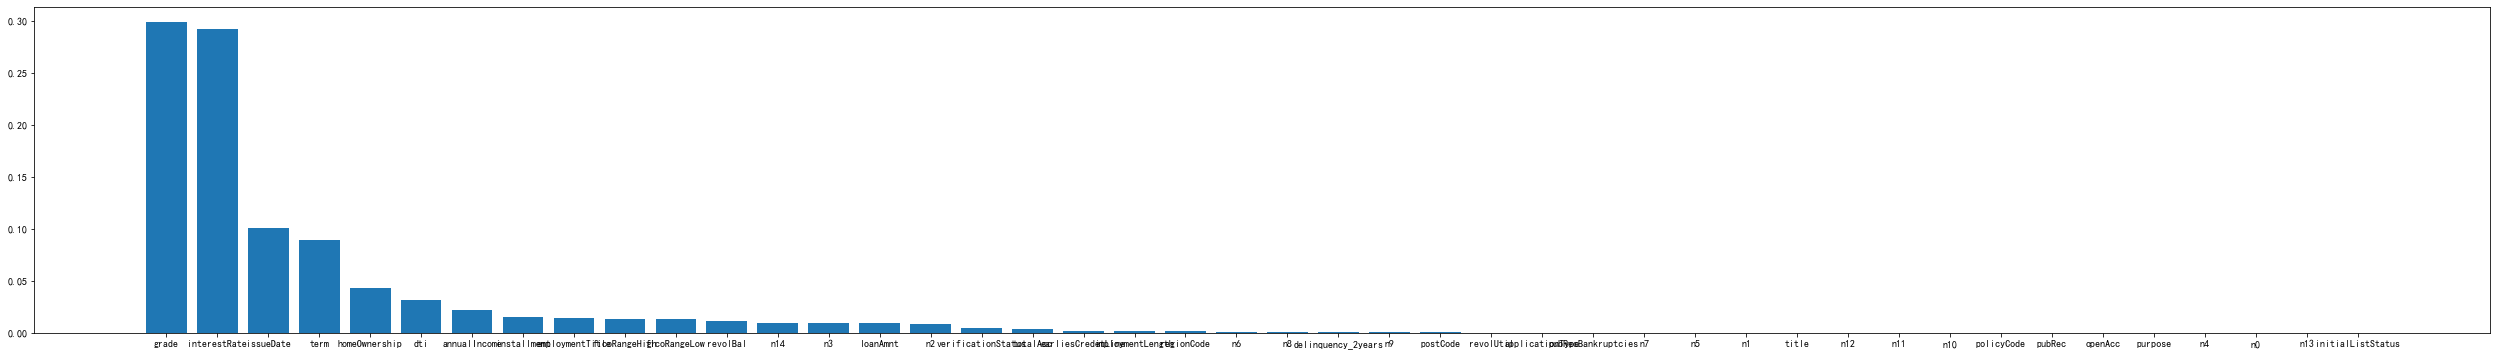

In [36]:
# 画图
plt.figure(figsize=(len(data.columns), 6))

plt.bar(np.arange(44), importances[np.argsort(importances)][::-1]) 
_ = plt.xticks(np.arange(44),data.columns[np.argsort(importances)][::-1] )

In [37]:
# 保留重要性较高的特征
new_columns = data.columns[np.argsort(importances)][::-1][:15]
data = data[new_columns]
data.head()

,grade,interestRate,issueDate,term,homeOwnership,dti,annualIncome,installment,employmentTitle,ficoRangeHigh,ficoRangeLow,revolBal,n14,n3,loanAmnt
0,5.0,19.52,2587,5,2,17.05,0.477596,1.834219,-0.672980,734.0,730.0,24178.0,2.0,2.0,2.359899
1,4.0,18.49,1888,5,0,27.83,-0.426660,0.090950,1.385426,704.0,700.0,15096.0,2.0,5.0,0.410437
2,4.0,16.99,3044,5,0,22.77,-0.031048,-0.534886,-0.378757,679.0,675.0,4606.0,4.0,3.0,-0.277609
3,1.0,7.26,2983,3,1,17.21,0.590628,-0.371327,-0.236644,689.0,685.0,9948.0,1.0,6.0,-0.392283
4,3.0,12.99,3196,3,1,32.16,-0.666853,-1.288275,-0.675475,694.0,690.0,2942.0,4.0,7.0,-1.309677


### 5.数据不平衡性处理

In [38]:
# 只是对训练集的数据进行数据不平衡性处理
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [39]:
data_sample,target_sample = smote.fit_resample(data,target)

In [40]:
(target_sample == 0).sum()

640390

In [41]:
(target_sample == 1).sum()

640390

### 6.模型选择和训练

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [43]:
X_train,X_test,y_train,y_test = train_test_split(data_sample,target_sample,test_size=0.2)

In [44]:
lr = LogisticRegression()
%time lr.fit(X_train,y_train)

Wall time: 8.33 s


LogisticRegression()

In [45]:
lr.score(X_train,y_train)

0.6574460485016943

In [46]:
lr.score(X_test,y_test)

0.6567794625150299

#### 6.1尝试使用新的模型xgboost进行调参

In [1]:
import xgboost as xgb

In [49]:
data_train = xgb.DMatrix(X_train,label = y_train)
data_test = xgb.DMatrix(X_test,label = y_test)

In [50]:
watch_list = [(data_test,'eval'),(data_train,'train')]
param = {
     'max_depth': 4,
     'eta': 0.1,
     'objective': 'multi:softmax',
     'num_class': 3
}

In [52]:
bst = xgb.train(param, data_train, num_boost_round=4, evals=watch_list)
y_hat = bst.predict(data_test)
result = y_test == y_hat
print('正确率:\t', float(np.sum(result)) / len(y_hat))

[11:07:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	eval-mlogloss:1.02060	train-mlogloss:1.02048
[1]	eval-mlogloss:0.95494	train-mlogloss:0.95465
[2]	eval-mlogloss:0.89878	train-mlogloss:0.89871
[3]	eval-mlogloss:0.85064	train-mlogloss:0.84998
正确率:	 0.7632146036009306


#### 6.2 尝试使用xgboost模型进行训练

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)

In [ ]:
svc.score(X_train,y_train)

In [ ]:
svc.score(X_test,y_test)

#### catboost的使用

In [2]:
from catboost import CatBoostClassifier

### 7.网格搜索进行调参

In [51]:
from sklearn.model_selection import GridSearchCV

In [58]:
lr = LogisticRegression()
param_grid = {
    'C':[0.1,1,10],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

gv = GridSearchCV(lr, param_grid=param_grid, cv=5, n_jobs=8)
%time gv.fit(X_train, y_train)

Wall time: 29min 45s


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=8,
             param_grid={'C': [0.1, 1, 10],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [60]:
gv.best_params_

{'C': 0.1, 'solver': 'newton-cg'}

In [61]:
gv.score(X_train,y_train)

0.6797098252627305

In [62]:
gv.score(X_test,y_test)

0.6799138025265854

In [63]:
gv.best_estimator_.score(X_test,y_test)

0.6799138025265854

#### 7.2对xgboost进行网格调参

In [ ]:
xgboost.train(params,
 data_train,
 num_boost_round=10,
 evals(),
 obj=None,
 feval=None,
 maximize=False,
 early_stopping_rounds=None,
 evals_result=None,
 verbose_eval=True,
 learning_rates=None,
 xgb_model=None)

In [ ]:
params = {
 'booster':'gbtree',
 'objective':'multi:softmax', # 多分类问题
 'num_class':10, # 类别数，与multi softmax并⽤
 'gamma':0.1, # ⽤于控制是否后剪枝的参数，越⼤越保守，⼀般0.1 0.2的样⼦
 'max_depth':12, # 构建树的深度，越⼤越容易过拟合
 'lambda':2, # 控制模型复杂度的权重值的L2 正则化项参数，参数越⼤，模型越不容易过拟合
 'subsample':0.7, # 随机采样训练样本
 'colsample_bytree':3,# 这个参数默认为1，是每个叶⼦⾥⾯h的和⾄少是多少
 # 对于正负样本不均衡时的0-1分类⽽⾔，假设h在0.01附近，min_child_weight为1
 # 意味着叶⼦节点中最少需要包含100个样本。这个参数⾮常影响结果，
 # 控制叶⼦节点中⼆阶导的和的最⼩值，该参数值越⼩，越容易过拟合
 'silent':0, # 设置成1 则没有运⾏信息输⼊，最好是设置成0
 'eta':0.007, # 如同学习率
 'seed':1000,
 'nthread':7, #CPU线程数
 #'eval_metric':'auc'
}

In [ ]:
bst = xgb.train(param, data_train, num_boost_round=4, evals=watch_list)
y_hat = bst.predict(data_test)
result = y_test == y_hat
print('正确率:\t', float(np.sum(result)) / len(y_hat))

### 8.进行评估

### 9.导出测试集的结果

#### 9.1 对测试集进行特征选择

In [58]:
testA_new = testA_data[new_columns]
testA_new.head()

,grade,interestRate,issueDate,term,homeOwnership,dti,annualIncome,installment,employmentTitle,ficoRangeHigh,ficoRangeLow,revolBal,n14,n3,loanAmnt
0,2.0,10.99,2587,3,0,10.56,0.053726,0.077113,-0.610091,719.0,715.0,9846.0,3.0,6.0,-0.048260
1,3.0,14.65,2952,5,0,21.40,-0.370144,0.130092,-0.109383,674.0,670.0,8946.0,2.0,3.0,0.639785
2,4.0,19.99,3410,3,1,33.50,-0.228854,0.029831,-0.455187,714.0,710.0,970.0,7.0,4.0,-0.277609
3,3.0,14.31,2710,5,0,13.95,-0.553821,-0.107354,-0.670017,689.0,685.0,10249.0,3.0,2.0,0.353100
4,4.0,17.09,3775,3,1,24.97,0.053726,3.101144,2.778836,689.0,685.0,33199.0,1.0,11.0,2.359899


In [59]:
data_testA = xgb.DMatrix(testA_new)

In [60]:
y_testA_hat = bst.predict(data_testA)

array([0., 0., 1., ..., 0., 1., 0.], dtype=float32)

In [63]:
# index 为False 导出文件时可以去掉文件的索引
result = testA_data[['id']]
result['isDefault'] = y_testA_hat
result.to_csv("./data/result_xgboost.csv",index= False)